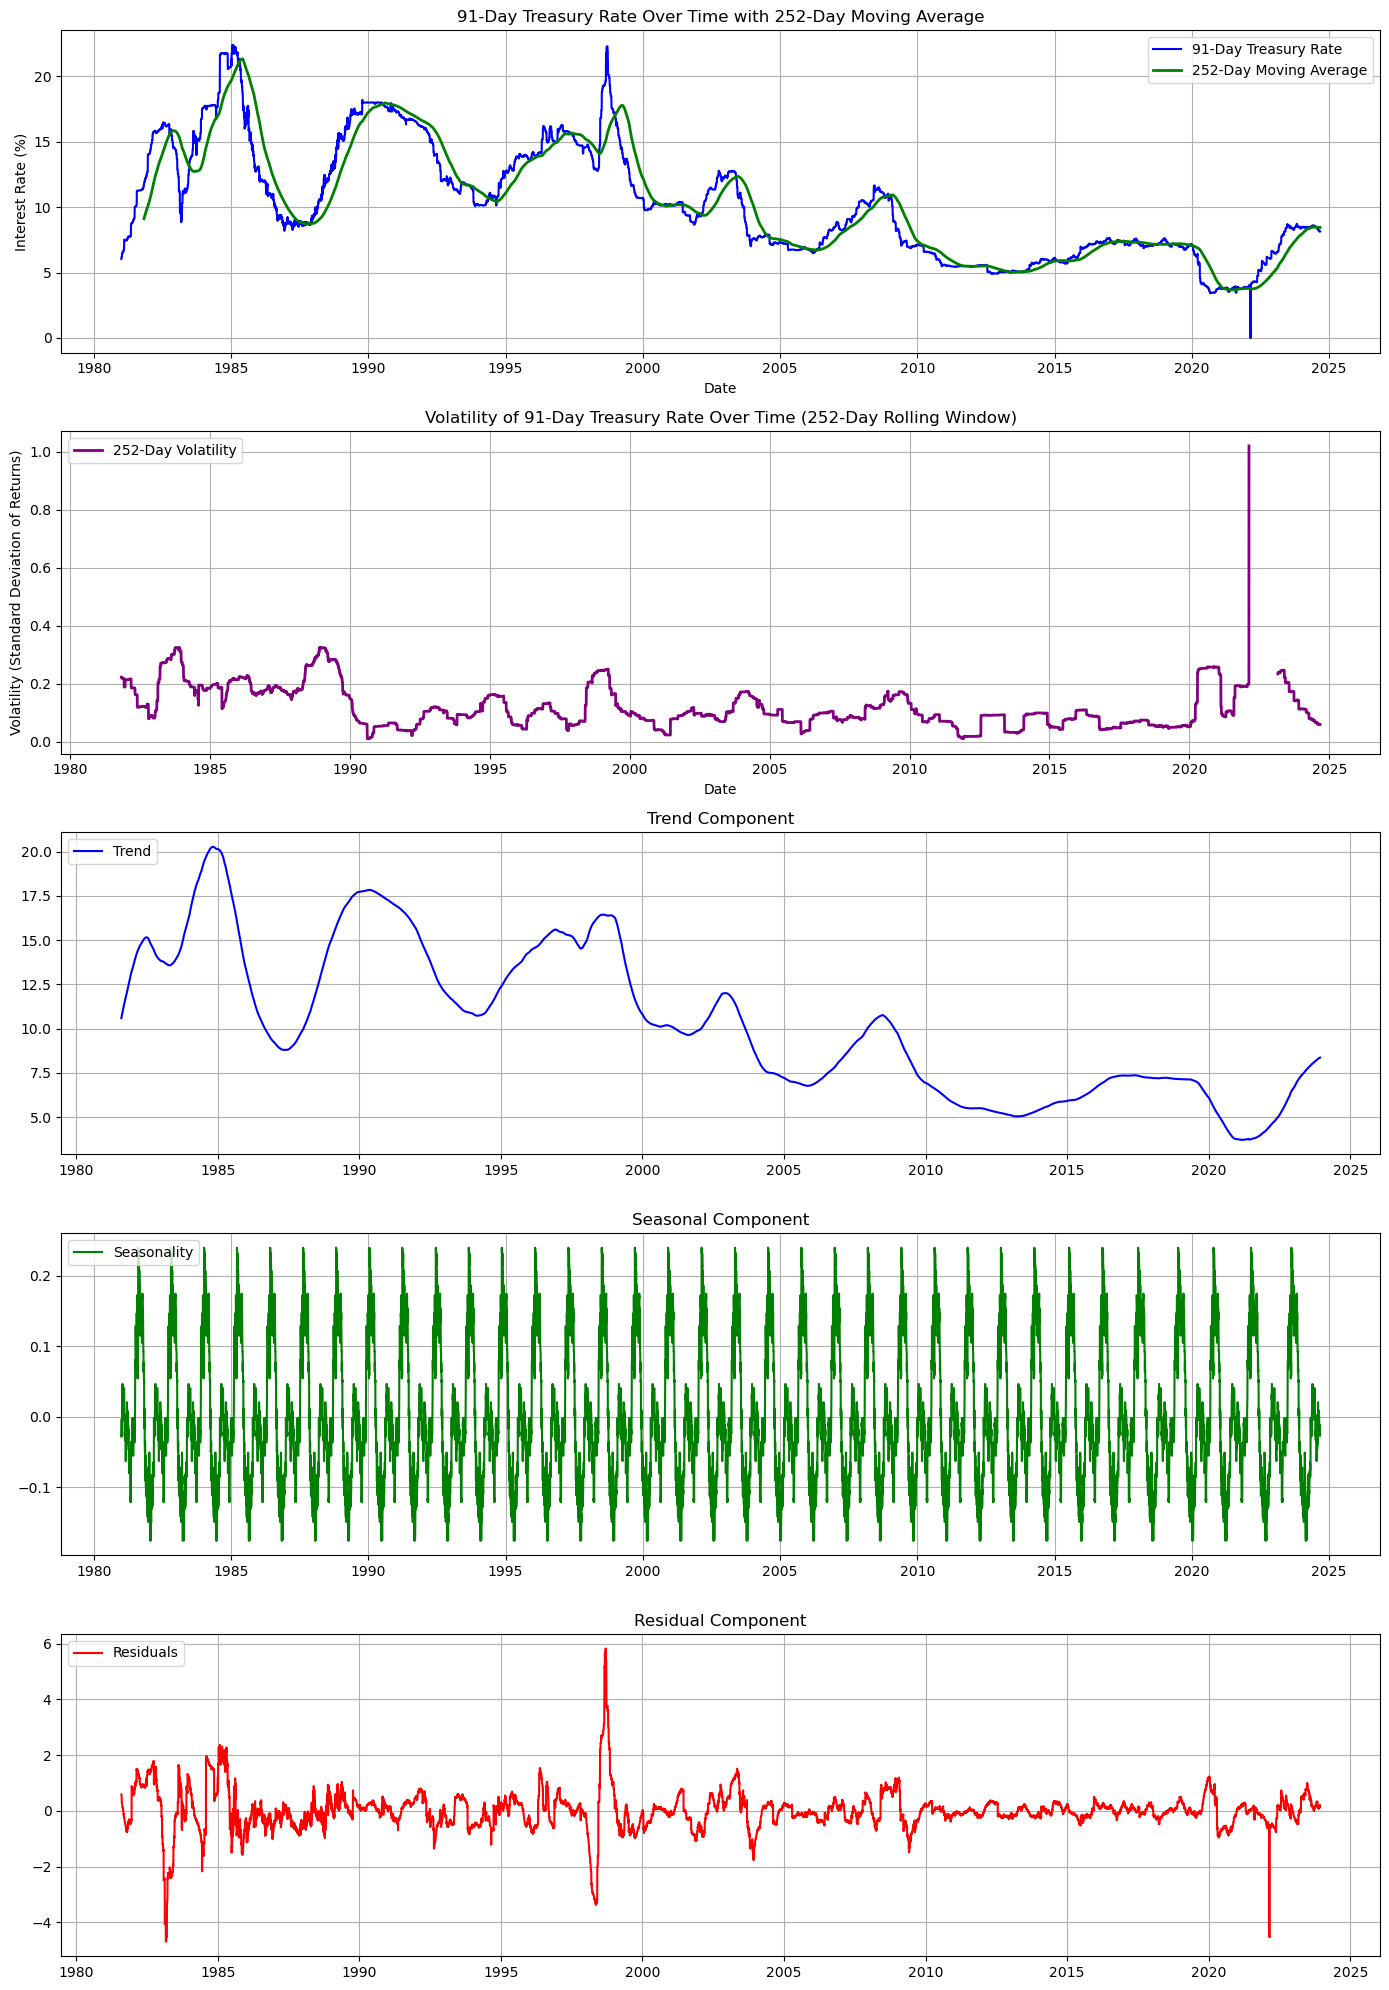

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the CSV file
file_path = 'HistoricalRateDetail91daytreasury.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date in ascending order
data = data.sort_values(by='Date')

# Adding a 252-day moving average to the plot
data['Moving_Average_252'] = data['Value'].rolling(window=252).mean()

# Calculate daily returns
data['Returns'] = data['Value'].pct_change()

# Calculate the rolling volatility (standard deviation of returns)
data['Volatility_252'] = data['Returns'].rolling(window=252).std() * (252**0.5)  # Annualizing the volatility

# Decomposing the time series using an additive model
decomposition = seasonal_decompose(data.set_index('Date')['Value'], model='additive', period=365)

# Create a figure with multiple subplots
plt.figure(figsize=(14, 20))

# 1. Plot the time series data with the 252-day moving average
plt.subplot(511)
plt.plot(data['Date'], data['Value'], color='blue', label='91-Day Treasury Rate', linewidth=1.5)
plt.plot(data['Date'], data['Moving_Average_252'], color='green', label='252-Day Moving Average', linewidth=2)
plt.title('91-Day Treasury Rate Over Time with 252-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)

# 2. Plot the volatility
plt.subplot(512)
plt.plot(data['Date'], data['Volatility_252'], color='purple', label='252-Day Volatility', linewidth=2)
plt.title('Volatility of 91-Day Treasury Rate Over Time (252-Day Rolling Window)')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.legend()
plt.grid(True)

# 3. Plot the decomposed components (Trend, Seasonality, Residuals)
# Trend
plt.subplot(513)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.legend(loc='upper left')
plt.grid(True)

# Seasonal
plt.subplot(514)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')
plt.grid(True)

# Residual
plt.subplot(515)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


1. 91-Day Treasury Rate Over Time with 252-Day Moving Average
Plot Description: This plot shows the raw time series of the 91-day treasury rate (in blue) along with its 252-day moving average (in green).
Insights:
The raw treasury rate data exhibits noticeable fluctuations over time, with some periods showing significant spikes or drops.
The 252-day moving average smooths out these short-term fluctuations, providing a clearer view of the long-term trends in the interest rate. This moving average indicates periods where the rates were generally rising or falling over the course of approximately one year (252 trading days, roughly the number of trading days in a year).
2. Volatility of 91-Day Treasury Rate Over Time (252-Day Rolling Window)
Plot Description: This plot represents the annualized volatility (standard deviation) of the daily returns of the 91-day treasury rate, calculated over a rolling 252-day window.
Insights:
The volatility plot highlights periods where the treasury rate was more or less stable. High volatility indicates greater uncertainty and risk, with rates fluctuating more dramatically, while low volatility suggests a period of relative stability.
It is evident that there are distinct periods of increased volatility, which could be associated with macroeconomic events, financial crises, or changes in monetary policy.
3. Trend Component
Plot Description: The trend component is extracted from the time series through seasonal decomposition. It shows the underlying direction of the treasury rates, filtering out short-term noise and seasonal effects.
Insights:
The trend component provides a smooth line that indicates the general movement of treasury rates over time. This can help identify periods of prolonged increases or decreases in rates.
Understanding the trend is crucial for long-term investment decisions, as it shows the broader economic conditions influencing interest rates.
4. Seasonal Component
Plot Description: The seasonal component captures the repeating patterns or cycles within the data that recur at the same period every year.
Insights:
The seasonal component reveals whether there are predictable patterns in the treasury rates within a year. For instance, there may be seasonal influences due to fiscal policies, economic cycles, or other periodic factors that impact interest rates.
If the seasonal component shows regular fluctuations, it could suggest certain times of the year when treasury rates are typically higher or lower.
5. Residual Component
Plot Description: The residual component represents the noise or random fluctuations in the data after removing both the trend and seasonal components.
Insights:
The residuals show the part of the treasury rate movements that cannot be explained by the trend or seasonality. These are typically irregular movements caused by unforeseen events, such as political instability, sudden economic shifts, or other unexpected factors.
Understanding the residuals is essential for recognizing the unpredictability in the market, which is beyond the regular trends and seasonal patterns.
Overall Commentary
The combined analysis of these plots provides a comprehensive view of the 91-day treasury rate's behavior over time. By examining the raw data, trends, volatility, seasonality, and residuals, we gain deeper insights into the underlying factors driving interest rate changes and the potential risks and opportunities for investors. This multi-faceted analysis is particularly useful for financial analysts, policymakers, and investors seeking to make informed decisions based on historical data trends.